<a href="https://colab.research.google.com/github/Chpel/Maga/blob/main/OSDA%20.ipynb/Big%20homework/Bin_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from pathlib import Path
import matplotlib.pyplot as plt

# Каталог датасетов

In [2]:
#local
data_cat = Path.cwd().parent.parent / 'datasets'
if Path.exists(data_cat):
    datasets = list(data_cat.glob('*.csv'))
    print(*list(map(lambda x: x.name, datasets)), sep='\n')

bike_bin.csv
bike_buyers_clean.csv
cancer patient data sets.csv
cancer_bin.csv
car.csv
car_bin.csv


In [3]:
#colab
#!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d rashmiranu/banking-dataset-classification
!kaggle datasets download -d heeraldedhia/bike-buyers
!kaggle datasets download -d subhajeetdas/car-acceptability-classification-dataset
!mkdir datasets
!unzip banking-dataset-classification -d datasets
!unzip bike-buyers -d datasets
!unzip car-acceptability-classification-dataset -d datasets
data_cat = Path.cwd() / 'datasets'

"kaggle" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"kaggle" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"kaggle" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
unzip:  cannot find either banking-dataset-classification or banking-dataset-classification.zip.
unzip:  cannot find either bike-buyers or bike-buyers.zip.
unzip:  cannot find either car-acceptability-classification-dataset or car-acceptability-classification-dataset.zip.


# Датасет 1

Полученные признаки:
    
    high_educ - наличие проффесиональных навыков
    has_job - наличие работы
    married - находится ли в браке
    default - наличие дефолта,
    housing - ипотека, 
    loan - задолженность, 
    cell_cont - контакты по сотовому, 
    before_con - контакты ранее (до данной рекламной компании),
    current_con - контакты во время текущей компании, 
    long_dur - долгий ли был последний разговор, 
    poutcome - успех прошлой кампании, 
    y - успех текущей компании

In [42]:
df = pd.read_csv(data_cat/"new_train.csv")

In [43]:
for c in df.columns.drop([]):
    print(c,pd.unique(df[c]))

age [49 37 78 36 59 29 26 30 50 33 44 32 43 56 40 47 34 46 39 41 55 38 63 23
 48 53 35 51 71 58 21 45 25 77 28 52 80 57 22 60 27 24 31 42 54 81 64 79
 20 76 82 19 68 65 73 66 85 74 61 86 69 18 83 88 70 87 84 75 62 72 67 89
 17 91 98]
job ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']
marital ['married' 'divorced' 'single' 'unknown']
education ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']
default ['unknown' 'no' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['cellular' 'telephone']
month ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week ['wed' 'mon' 'tue' 'fri' 'thu']
duration [ 227  202 1148 ... 1882 1666 1434]
campaign [ 4  2  1  5  9  3  7  6 13  8 12 10 19 11 31 17 16 29 43 20 14 21 35 15
 33 28 22 25 18 23 27 26 24 34 32 37 30 42 40 56]
pdays [999   3   6  10   

In [44]:
raw_df = df[(df != 'unknown').all(axis=1)].reset_index(drop=True)
raw_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
1,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
2,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
3,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
4,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24300,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
24301,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
24302,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
24303,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


marital
divorced    Axes(0.125,0.11;0.775x0.77)
married     Axes(0.125,0.11;0.775x0.77)
single      Axes(0.125,0.11;0.775x0.77)
Name: y, dtype: object

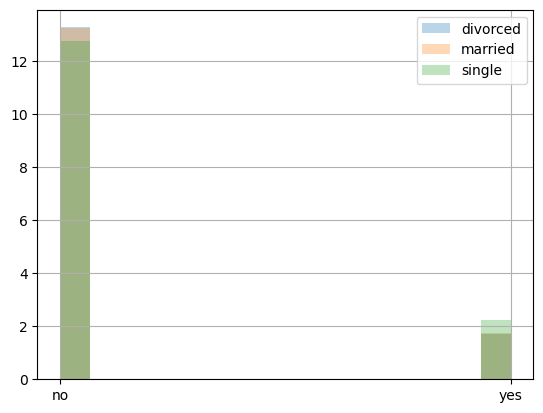

In [73]:
#raw_df[raw_df['pdays']<999].groupby('y')['pdays'].hist(alpha=0.3, density=True, legend=True)
raw_df.groupby('marital')['y'].hist(alpha=0.3, density=True, bins=15, legend=True)

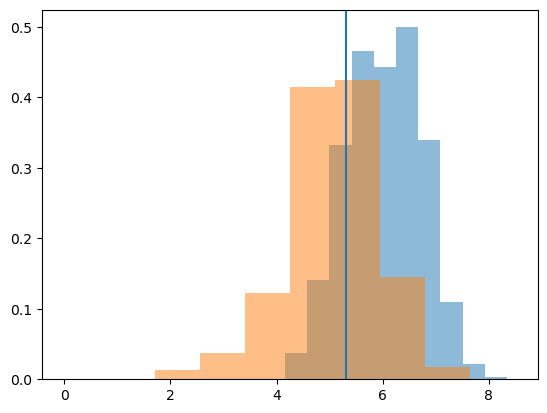

In [45]:
plt.hist(np.log(raw_df[raw_df['y'] == 'yes']['duration']+1), alpha=0.5, density=True)
plt.hist(np.log(raw_df[raw_df['y'] == 'no']['duration']+1), alpha=0.5, density=True)
plt.axvline(5.3)

In [68]:
raw_df.age.median()

37.0

In [78]:
cols = ['big_age','high_educ', 'has_job', 'default',
        'housing', 'loan', 'cell_cont', 'before_con',
        'influence_ccon', 'long_dur', 'poutcome', 'y']
idx = raw_df.index
res_df = pd.DataFrame(columns=cols, index=idx)
res_df['big_age'] = (raw_df['age'] > 37)
res_df['high_educ'] = ((raw_df['education'] == 'university.degree') | (raw_df['education'] == 'professional.course'))
res_df['has_job'] = ((raw_df['job'] != 'retired') & (raw_df['job'] != 'unemployed') & (raw_df['job'] != 'student'))
#res_df['married'] = (raw_df['marital'] == 'married')
res_df['default'] = (raw_df['default'] == 'yes')
res_df['housing'] = (raw_df['housing'] != 'yes')
res_df['loan'] = (raw_df['loan'] != 'yes')
res_df['cell_cont'] = (raw_df['contact'] != 'cellular')
res_df['before_con'] = (raw_df['previous'] > 0)
#res_df['current_con'] = (raw_df['campaign'] > 0)
res_df['influence_ccon'] = (raw_df['campaign'] >= 2)
res_df['long_dur'] = (np.log(raw_df['duration']+1) > 5.25)
res_df['poutcome'] = (raw_df['poutcome'] == 'success')
res_df['y'] = (raw_df['y'] == 'yes')
res_df

,big_age,high_educ,has_job,default,housing,loan,cell_cont,before_con,influence_ccon,long_dur,poutcome,y
0,False,True,True,False,True,True,True,True,True,True,False,False
1,True,False,False,False,True,True,False,False,False,True,False,True
2,False,True,True,False,False,True,True,False,True,False,False,False
3,True,True,False,False,True,True,False,False,True,True,False,False
4,False,True,True,False,True,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
24300,False,False,True,False,False,True,False,False,False,True,False,False
24301,True,True,True,False,False,True,False,True,False,False,False,False
24302,True,False,True,False,True,False,False,False,True,False,False,False
24303,False,True,True,False,True,True,True,False,False,False,False,False


In [79]:
res_df.to_csv(data_cat / 'bank_bin.csv')

# Датасет 2

In [11]:
df = pd.read_csv(data_cat / "bike_buyers_clean.csv")
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


In [12]:
for c in df.columns.drop(["ID", "Income", "Age"]):
    print(c, pd.unique(df[c]))

Marital Status ['Married' 'Single']
Gender ['Female' 'Male']
Children [1 3 5 0 2 4]
Education ['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
Occupation ['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']
Home Owner ['Yes' 'No']
Cars [0 1 2 4 3]
Commute Distance ['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' '10+ Miles']
Region ['Europe' 'Pacific' 'North America']
Purchased Bike ['No' 'Yes']


In [13]:
#raw_df = df[df.columns.drop(["Gender","ID", "Income", "Children", "Age", "Cars", "Marital Status", "Home Owner", "Purchased Bike"])]
raw_df = df[['Commute Distance']]
raw_df

,Commute Distance
0,0-1 Miles
1,0-1 Miles
2,2-5 Miles
3,5-10 Miles
4,0-1 Miles
...,...
995,2-5 Miles
996,2-5 Miles
997,0-1 Miles
998,1-2 Miles


In [14]:
ohe = OneHotEncoder(dtype=int)
ohe.fit(raw_df)
res_columns = ohe.get_feature_names_out(raw_df.columns)
bin_df = ohe.transform(raw_df).toarray()
bin_df = pd.DataFrame(bin_df, columns=res_columns, index=df.index)
bin_df

,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
995,0,0,0,1,0
996,0,0,0,1,0
997,1,0,0,0,0
998,0,1,0,0,0


C:\Users\Admin\AppData\Local\Temp\ipykernel_14596\3363736554.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  float_df.hist(ax=ax);


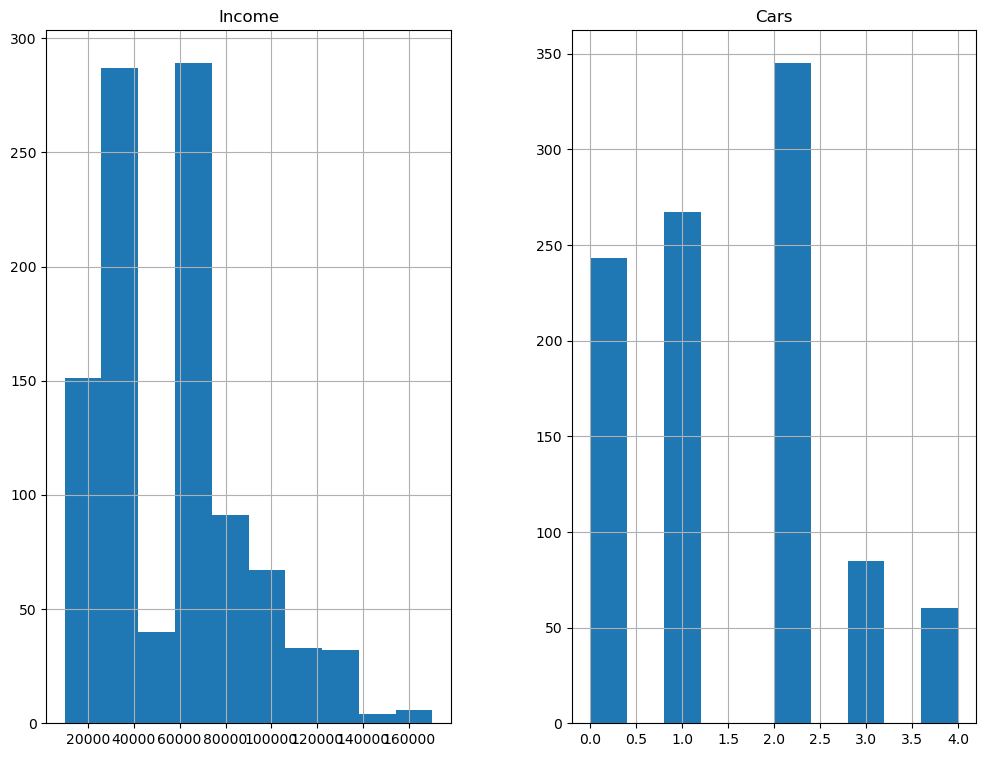

In [15]:
#float_df = df[["Income", "Age", "Children", "Cars"]]
float_df = df[['Income','Cars']]
fig, ax = plt.subplots(figsize=(12,9), facecolor='white')
float_df.hist(ax=ax);

In [16]:
hister = KBinsDiscretizer(n_bins=[2, 2])
float_res = hister.fit_transform(float_df).toarray()
float_bin = pd.DataFrame(data=float_res, columns=hister.get_feature_names_out(), index=float_df.index, dtype=int)
float_bin

,Income_0.0,Income_1.0,Cars_0.0,Cars_1.0
0,1,0,1,0
1,1,0,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,1,0
...,...,...,...,...
995,0,1,0,1
996,0,1,1,0
997,0,1,1,0
998,0,1,0,1


In [17]:
float_map = {name:i for i, name in enumerate(float_df.columns)}
res = []
for i,s in enumerate(float_bin.columns):
    col_name=s.split('_')[0]
    col_num=float_map[col_name]
    bin_num=int(float(s.split('_')[-1]))
    res.append(col_name+'_'+str(int(hister.bin_edges_[col_num][bin_num]))+'-'+str(int(hister.bin_edges_[col_num][bin_num+1])))
float_bin.columns = res
float_bin

,Income_10000-60000,Income_60000-170000,Cars_0-1,Cars_1-4
0,1,0,1,0
1,1,0,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,1,0
...,...,...,...,...
995,0,1,0,1
996,0,1,1,0
997,0,1,1,0
998,0,1,0,1


In [18]:
#prebin_df = df[["Gender","Marital Status", "Home Owner", "Purchased Bike"]]
prebin_df = df[["Gender","Purchased Bike"]]
prebin_df

,Gender,Purchased Bike
0,Female,No
1,Male,No
2,Male,No
3,Male,Yes
4,Male,Yes
...,...,...
995,Male,Yes
996,Male,Yes
997,Male,Yes
998,Male,No


In [19]:
ohe = OneHotEncoder(dtype=int, drop='if_binary')
ohe.fit(prebin_df)
ohe.categories_

[array(['Female', 'Male'], dtype=object), array(['No', 'Yes'], dtype=object)]

In [20]:
res_columns = ohe.get_feature_names_out(prebin_df.columns)
bin2_df = ohe.transform(prebin_df).toarray()
bin2_df = pd.DataFrame(bin2_df, columns=res_columns, index=df.index)

In [21]:
res_df = float_bin.merge(right=bin_df, left_index=True, right_index=True)
res_df = res_df.merge(right=bin2_df, left_index=True, right_index=True)
res_df

,Income_10000-60000,Income_60000-170000,Cars_0-1,Cars_1-4,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Gender_Male,Purchased Bike_Yes
0,1,0,1,0,1,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,0,1,0
2,0,1,0,1,0,0,0,1,0,1,0
3,0,1,0,1,0,0,0,0,1,1,1
4,1,0,1,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,0,1,0,1,1
996,0,1,1,0,0,0,0,1,0,1,1
997,0,1,1,0,1,0,0,0,0,1,1
998,0,1,0,1,0,1,0,0,0,1,0


In [23]:
res_df.rename({'Home Owner_Yes': 'Home Owner', 'Purchased Bike_Yes': 'Purchased', 'Cars_0-1': 'Cars_0'}, axis=1, inplace=True)
res_df.columns

Index(['Income_10000-60000', 'Income_60000-170000', 'Cars_0', 'Cars_1-4',
       'Commute Distance_0-1 Miles', 'Commute Distance_1-2 Miles',
       'Commute Distance_10+ Miles', 'Commute Distance_2-5 Miles',
       'Commute Distance_5-10 Miles', 'Gender_Male', 'Purchased'],
      dtype='object')

Полученные признаки:

    Income_10000-60000, Income_60000-170000 - бин распределения дохода по диапазонам
    Cars_0, Cars_1-4 - бин распределения числа машин по диапазонам
    Commute Distance_*** Miles - распределение дальности дороги между домой и работой
    Gender_Male - мужской пол
    Purchased - факт приобретения велосипеда

In [24]:
res_df.to_csv(data_cat / 'bike_bin.csv')

# Датасет 3

In [25]:
df = pd.read_csv(data_cat / "car.csv")

In [26]:
df.dtypes

Buying_Price         object
Maintenance_Price    object
No_of_Doors          object
Person_Capacity      object
Size_of_Luggage      object
Safety               object
Car_Acceptability    object
dtype: object

In [27]:
for c in df.columns.drop([]):
    print(c, pd.unique(df[c]))

Buying_Price ['vhigh' 'high' 'med' 'low']
Maintenance_Price ['vhigh' 'high' 'med' 'low']
No_of_Doors ['2' '3' '4' '5more']
Person_Capacity ['2' '4' 'more']
Size_of_Luggage ['small' 'med' 'big']
Safety ['low' 'med' 'high']
Car_Acceptability ['unacc' 'acc' 'vgood' 'good']


In [28]:
raw_df = df.drop(['Car_Acceptability', 'No_of_Doors', 'Size_of_Luggage'], axis=1)
raw_df = raw_df[((raw_df.Buying_Price != 'vhigh') & (raw_df.Maintenance_Price != 'vhigh'))]
raw_df

,Buying_Price,Maintenance_Price,Person_Capacity,Safety
540,high,high,2,low
541,high,high,2,med
542,high,high,2,high
543,high,high,2,low
544,high,high,2,med
...,...,...,...,...
1723,low,low,more,med
1724,low,low,more,high
1725,low,low,more,low
1726,low,low,more,med


In [29]:
ohe = OneHotEncoder(dtype=int)
ohe.fit(raw_df)
ohe.categories_

[array(['high', 'low', 'med'], dtype=object),
 array(['high', 'low', 'med'], dtype=object),
 array(['2', '4', 'more'], dtype=object),
 array(['high', 'low', 'med'], dtype=object)]

In [30]:
res_columns = ohe.get_feature_names_out(raw_df.columns)
res_columns

array(['Buying_Price_high', 'Buying_Price_low', 'Buying_Price_med',
       'Maintenance_Price_high', 'Maintenance_Price_low',
       'Maintenance_Price_med', 'Person_Capacity_2', 'Person_Capacity_4',
       'Person_Capacity_more', 'Safety_high', 'Safety_low', 'Safety_med'],
      dtype=object)

In [31]:
bin_df = ohe.transform(raw_df).toarray()

In [32]:
bin_df.dtype

dtype('int32')

In [33]:
bin_df = pd.DataFrame(bin_df, columns=res_columns, index=raw_df.index)

In [34]:
y = df['Car_Acceptability'].map({'unacc': 0, 'acc' : 1, 'good' : 1, 'vgood' : 1})

In [35]:
res_df = bin_df.merge(right=y, left_index=True, right_index=True)
res_df.reset_index(drop=True,inplace=True)
res_df

,Buying_Price_high,Buying_Price_low,Buying_Price_med,Maintenance_Price_high,Maintenance_Price_low,Maintenance_Price_med,Person_Capacity_2,Person_Capacity_4,Person_Capacity_more,Safety_high,Safety_low,Safety_med,Car_Acceptability
0,1,0,0,1,0,0,1,0,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,0,0
3,1,0,0,1,0,0,1,0,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,0,1,0,0,1,0,0,0,1,0,0,1,1
968,0,1,0,0,1,0,0,0,1,1,0,0,1
969,0,1,0,0,1,0,0,0,1,0,1,0,0
970,0,1,0,0,1,0,0,0,1,0,0,1,1


!!! Намеренное подрезание датасета от значений выше high 

Полученные признаки:

    Buying_Price_high/low/med - стоимость машины
    Maintenance_Price_high/low/med - стоимость обслуживания
    Person_Capacity_2/4/more - вместимость людей
    Safety_high/low/med - параметр безопасности
    Car_Acceptability - доступность автомобиля (True = acc/good/vgood)

In [39]:
res_df.to_csv(data_cat / 'car_bin.csv')

<Axes: >

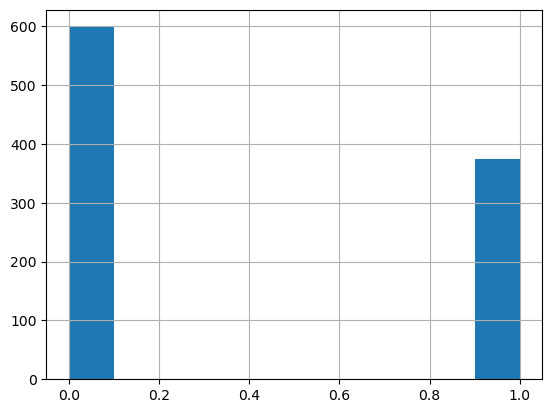

In [40]:
res_df.Car_Acceptability.hist()